In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
dataset_path = "/content/drive/MyDrive/dataset"  # Change this path as per your dataset location
os.chdir(dataset_path)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image


In [ ]:
import os

dataset_path = "/content/drive/MyDrive/dataset"  # Change this to your actual path

# Check if the dataset path exists
print("Dataset exists:", os.path.exists(dataset_path))
print("Train directory exists:", os.path.exists(dataset_path + "/train"))
print("Validate directory exists:", os.path.exists(dataset_path + "/validate"))
print("Test directory exists:", os.path.exists(dataset_path + "/test"))

# List files inside the dataset path
print("Folders inside dataset path:", os.listdir(dataset_path) if os.path.exists(dataset_path) else "Path does not exist")


Dataset exists: True
Train directory exists: True
Validate directory exists: True
Test directory exists: True
Folders inside dataset path: ['train', 'test', 'validate', '.ipynb_checkpoints', '360_F_939433653_S9V955FbM69e6eWesbY40QiaO9rE0reG.jpg', '360_F_939433653_S9V955FbM69e6eWesbY40QiaO9rE0reG (1).jpg', 'alloy-steel.webp', 'steel-tubes.webp', 'underwater-pipeline.jpg', 'pool.jpg', 'steeeeeeel.jpg', 'uploads', 'Untitled0.ipynb', 'corrosion_detection_model.h5']


In [ ]:
# Define dataset paths
train_dir = dataset_path + "/content/drive/MyDrive/dataset/train"
valid_dir = dataset_path + "/content/drive/MyDrive/dataset/validate"
test_dir = dataset_path + "/content/drive/MyDrive/dataset/test"

# Data Augmentation & Normalization
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load Images
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150),
                                                    batch_size=32, class_mode='binary')

valid_generator = valid_datagen.flow_from_directory(valid_dir, target_size=(150, 150),
                                                    batch_size=32, class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150),
                                                  batch_size=32, class_mode='binary')


NameError: name 'ImageDataGenerator' is not defined

In [ ]:
import os

dataset_path = "/content/drive/MyDrive/dataset"  # Fix this path

# Define dataset directories correctly
train_dir = os.path.join(dataset_path, "train")
valid_dir = os.path.join(dataset_path, "validate")
test_dir = os.path.join(dataset_path, "test")

# Check if directories exist
print("Dataset exists:", os.path.exists(dataset_path))
print("Train directory exists:", os.path.exists(train_dir))
print("Validate directory exists:", os.path.exists(valid_dir))
print("Test directory exists:", os.path.exists(test_dir))

# Check folders inside dataset
print("Folders inside dataset path:", os.listdir(dataset_path))


Dataset exists: True
Train directory exists: True
Validate directory exists: True
Test directory exists: True
Folders inside dataset path: ['train', 'test', 'validate', '.ipynb_checkpoints', '360_F_939433653_S9V955FbM69e6eWesbY40QiaO9rE0reG.jpg', '360_F_939433653_S9V955FbM69e6eWesbY40QiaO9rE0reG (1).jpg', 'alloy-steel.webp', 'steel-tubes.webp', 'underwater-pipeline.jpg', 'pool.jpg', 'steeeeeeel.jpg', 'uploads', 'Untitled0.ipynb', 'corrosion_detection_model.h5']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation & Normalization
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 🔹 Make sure train_dir is correctly assigned
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

valid_generator = valid_datagen.flow_from_directory(
    valid_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

print("Data Generators Loaded Successfully!")


Found 1340 images belonging to 2 classes.
Found 483 images belonging to 2 classes.
Found 268 images belonging to 2 classes.
Data Generators Loaded Successfully!


In [ ]:
# Define dataset paths
train_dir = dataset_path + "/train"
valid_dir = dataset_path + "/validate"
test_dir = dataset_path + "/test"

# Data Augmentation & Normalization
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load Images
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150),
                                                    batch_size=32, class_mode='binary')

valid_generator = valid_datagen.flow_from_directory(valid_dir, target_size=(150, 150),
                                                    batch_size=32, class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150),
                                                  batch_size=32, class_mode='binary')


Found 1340 images belonging to 2 classes.
Found 483 images belonging to 2 classes.
Found 268 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Prevents overfitting
    Dense(1, activation='sigmoid')  # Binary classification (corroded/non-corroded)
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_generator, validation_data=valid_generator, epochs=20)


Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 116s 3s/step - accuracy: 0.9465 - loss: 0.1551 - val_accuracy: 0.9772 - val_loss: 0.0898
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.9652 - loss: 0.1160 - val_accuracy: 0.9793 - val_loss: 0.0828
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.9592 - loss: 0.1314 - val_accuracy: 0.9689 - val_loss: 0.0957
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.9453 - loss: 0.1487 - val_accuracy: 0.9793 - val_loss: 0.0845
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9539 - loss: 0.1289 - val_accuracy: 0.9648 - val_loss: 0.1008
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.9508 - loss: 0.1437 - val_accuracy: 0.9814 - val_loss: 0.0809
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.9571 - loss: 0.1111 - val_accuracy: 0.9731 - val_loss: 0.0856
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.9586 - loss: 0.1104 - val_accuracy: 0.9669 - va

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


9/9 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.9869 - loss: 0.0533
Test Accuracy: 98.88%


In [ ]:
model.save("corrosion_detection_model.h5")
print("Model saved successfully!")


Model saved successfully!


In [ ]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("corrosion_detection_model.h5")

# Function to predict corrosion
def predict_corrosion(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    if prediction[0] > 0.5:
        print("Predicted: Non-Corroded")
    else:
        print("Predicted: Corroded")

# Example usage
predict_corrosion("/content/drive/MyDrive/dataset/test/corroded/image_0199_jpg.rf.7c029bba2608f88ce94bb32a023742f1.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Predicted: Corroded


In [ ]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("corrosion_detection_model.h5")

# Function to predict corrosion
def predict_corrosion(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    if prediction[0] > 0.5:
        print("Predicted: Non-Corroded")
    else:
        print("Predicted: Corroded")

# Example usage
predict_corrosion("/content/drive/MyDrive/dataset/test/noncorroded/metal1.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
Predicted: Non-Corroded


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 360_F_939433653_S9V955FbM69e6eWesbY40QiaO9rE0reG.jpg to 360_F_939433653_S9V955FbM69e6eWesbY40QiaO9rE0reG (1).jpg


In [ ]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("corrosion_detection_model.h5")

# Function to predict corrosion
def predict_corrosion(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    if prediction[0] > 0.5:
        print("Predicted: Non-Corroded")
    else:
        print("Predicted: Corroded")

# Example usage
predict_corrosion("/content/drive/MyDrive/dataset/360_F_939433653_S9V955FbM69e6eWesbY40QiaO9rE0reG.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Predicted: Corroded


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving alloy-steel.webp to alloy-steel.webp


In [ ]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("corrosion_detection_model.h5")

# Function to predict corrosion
def predict_corrosion(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    if prediction[0] > 0.5:
        print("Predicted: Non-Corroded")
    else:
        print("Predicted: Corroded")

# Example usage
predict_corrosion("/content/drive/MyDrive/dataset/alloy-steel.webp")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Predicted: Corroded


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving steel-tubes.webp to steel-tubes.webp


In [ ]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("corrosion_detection_model.h5")

# Function to predict corrosion
def predict_corrosion(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    if prediction[0] > 0.5:
        print("Predicted: Non-Corroded")
    else:
        print("Predicted: Corroded")

# Example usage
predict_corrosion("/content/drive/MyDrive/dataset/steel-tubes.webp")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Predicted: Non-Corroded


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving underwater-pipeline.jpg to underwater-pipeline.jpg


In [ ]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("corrosion_detection_model.h5")

# Function to predict corrosion
def predict_corrosion(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    if prediction[0] > 0.5:
        print("Predicted: Non-Corroded")
    else:
        print("Predicted: Corroded")

# Example usage
predict_corrosion("/content/drive/MyDrive/dataset/underwater-pipeline.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Predicted: Corroded


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving pool.jpg to pool.jpg


In [ ]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("corrosion_detection_model.h5")

# Function to predict corrosion
def predict_corrosion(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    if prediction[0] > 0.5:
        print("Predicted: Non-Corroded")
    else:
        print("Predicted: Corroded")

# Example usage
predict_corrosion("/content/drive/MyDrive/dataset/pool.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Predicted: Corroded


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving steeeeeeel.jpg to steeeeeeel.jpg


In [ ]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("corrosion_detection_model.h5")

# Function to predict corrosion
def predict_corrosion(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    if prediction[0] > 0.5:
        print("Predicted: Non-Corroded")
    else:
        print("Predicted: Corroded")

# Example usage
predict_corrosion("/content/drive/MyDrive/dataset/steeeeeeel.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Predicted: Non-Corroded


In [ ]:
from google.colab import files
files.download('corrosion_detection_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Found 1340 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 34s 812ms/step
Classification Report:
               precision    recall  f1-score   support

    Corroded       0.99      0.99      0.99       927
Non-Corroded       0.99      0.98      0.98       413

    accuracy                           0.99      1340
   macro avg       0.99      0.99      0.99      1340
weighted avg       0.99      0.99      0.99      1340



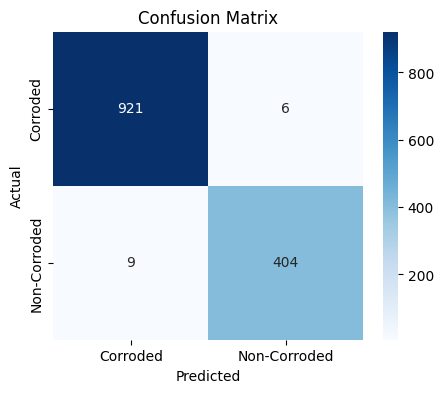

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# Load your trained model
model = tf.keras.models.load_model("corrosion_detection_model.h5")

# Define test directory (Make sure this path is correct)
test_dir = "/content/drive/MyDrive/dataset/train"

# Preprocess test images using ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Important: Do not shuffle for correct labels
)

# Make predictions on the test set
predictions = model.predict(test_generator)
y_pred = np.where(predictions > 0.5, 1, 0)  # Convert probabilities to binary (0 or 1)
y_true = test_generator.classes  # True labels

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Print classification report
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=["Corroded", "Non-Corroded"]))

# Visualize the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Corroded", "Non-Corroded"], yticklabels=["Corroded", "Non-Corroded"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import os
print(os.listdir())  # Lists all files in the current directory


['.config', 'drive', 'sample_data']
